<div style="text-align: center;">
    <h1>Email Marketing Open Rate Prediction</h1>
    <p style="text-align: center;">Benjamin Kim</p>
</div>

<h1> Introduction </h1>
<p> This project was built for my Codecademy Intermediate Machine Learning certificate. I decided to use a random forest model to predict whether an email will be opened or not. The idea of it is interesting since a lot of companies send out promotional emails to attempt to increase their customers. I chose to do a random forest model due to its ability to handle mixed data types, manage class imbalance, reduce overfitting, and capture complex relationships between features. Its built-in feature importance also provides valuable insights, making it both effective and interpretable for this dataset. </p> 

<h3> Import Libraries</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm

<h3>Loading Data</h3>

In [2]:
email_data = pd.read_csv('data/direct_email_marketing_database.csv')

<h3>EDA</h3>
<p>This removes the null values and replaces it. The ".describe" further shows the statistical details of each variable such as the mean, standard deviation, and the maximum value. </p>

In [3]:
email_data.info()
email_data.head()

missing_values = email_data.isnull().sum().sort_values(ascending=False)
print("\nMissing Values:")
print(missing_values[missing_values > 0])

for col in email_data.select_dtypes(include=['float64', 'int64']).columns:
    email_data[col].fillna(email_data[col].median(), inplace=True)

print("\nMissing Values After Imputation:")
print(email_data.isnull().sum().sort_values(ascending=False))

email_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38143 entries, 0 to 38142
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   upgrade_price           38143 non-null  int64  
 1   age                     38143 non-null  float64
 2   n_purchase              38143 non-null  int64  
 3   discount_purchase       38143 non-null  int64  
 4   n_reward                38143 non-null  int64  
 5   n_first_class           38143 non-null  int64  
 6   n_second_class          38143 non-null  int64  
 7   n_third_class           38143 non-null  int64  
 8   n_fourth_class          38143 non-null  int64  
 9   avg_npassengers         38143 non-null  float64
 10  avg_price               38143 non-null  float64
 11  sdt_dev_price           37410 non-null  float64
 12  avg_distance            38143 non-null  float64
 13  sdt_dev_distance        37410 non-null  float64
 14  since_last_purchase     38143 non-null

,upgrade_price,age,n_purchase,discount_purchase,n_reward,n_first_class,n_second_class,n_third_class,n_fourth_class,avg_npassengers,...,n_bounces,n_hits,total_session_duration,total_revenue,conversions,n_search,n_path,avg_hits,avg_session_duration,avg_revenue
count,38143.000000,38143.000000,38143.000000,38143.000000,38143.000000,38143.000000,38143.000000,38143.000000,38143.000000,38143.000000,...,38143.000000,38143.000000,3.814300e+04,3.814300e+04,38143.000000,38143.000000,38143.000000,38143.000000,3.814300e+04,3.814300e+04
mean,7.609679,40.661878,10.597148,2.204572,0.148337,0.611252,3.494324,0.156464,0.012689,1.761352,...,9.170988,694.378392,1.550114e+06,6.850401e+08,7.228535,12.403167,3.108067,27.087255,7.694703e+04,2.665642e+07
std,1.187000,14.513826,12.863937,3.061286,0.525794,1.548337,4.449734,0.571422,0.197373,1.193921,...,31.965915,1379.593541,9.061141e+06,3.253142e+09,15.694874,20.299191,4.209396,25.112965,6.712757e+05,4.234211e+07
min,4.000000,18.334359,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00
25%,8.000000,28.142578,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,48.000000,1.779950e+04,0.000000e+00,0.000000,1.000000,1.000000,15.000000,1.052943e+04,6.449107e+06
50%,8.000000,38.153537,8.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.400000,...,0.000000,314.000000,2.606800e+05,1.985000e+08,4.000000,5.000000,2.000000,21.500000,1.927630e+04,1.441097e+07
75%,8.000000,52.023400,13.000000,3.000000,0.000000,1.000000,4.000000,0.000000,0.000000,2.000000,...,7.000000,820.000000,9.149410e+05,6.576000e+08,8.000000,15.000000,4.000000,30.600000,3.489120e+04,2.870588e+07
max,8.000000,119.926139,326.000000,70.000000,18.000000,31.000000,130.000000,14.000000,12.000000,14.364548,...,936.000000,35664.000000,4.002802e+08,1.233744e+11,372.000000,426.000000,152.000000,500.000000,2.666900e+07,6.120000e+08


<h3>Confusion Matrix</h3>
<p> The confusion matrix shows the coorelation between all of the variables. We see that some variables are correlated to each other whereas others are not such as the 'is_second_class' and the 'n_third_class'.</p>

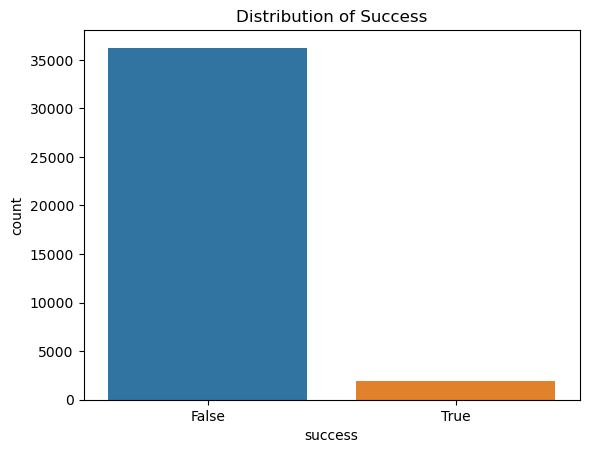

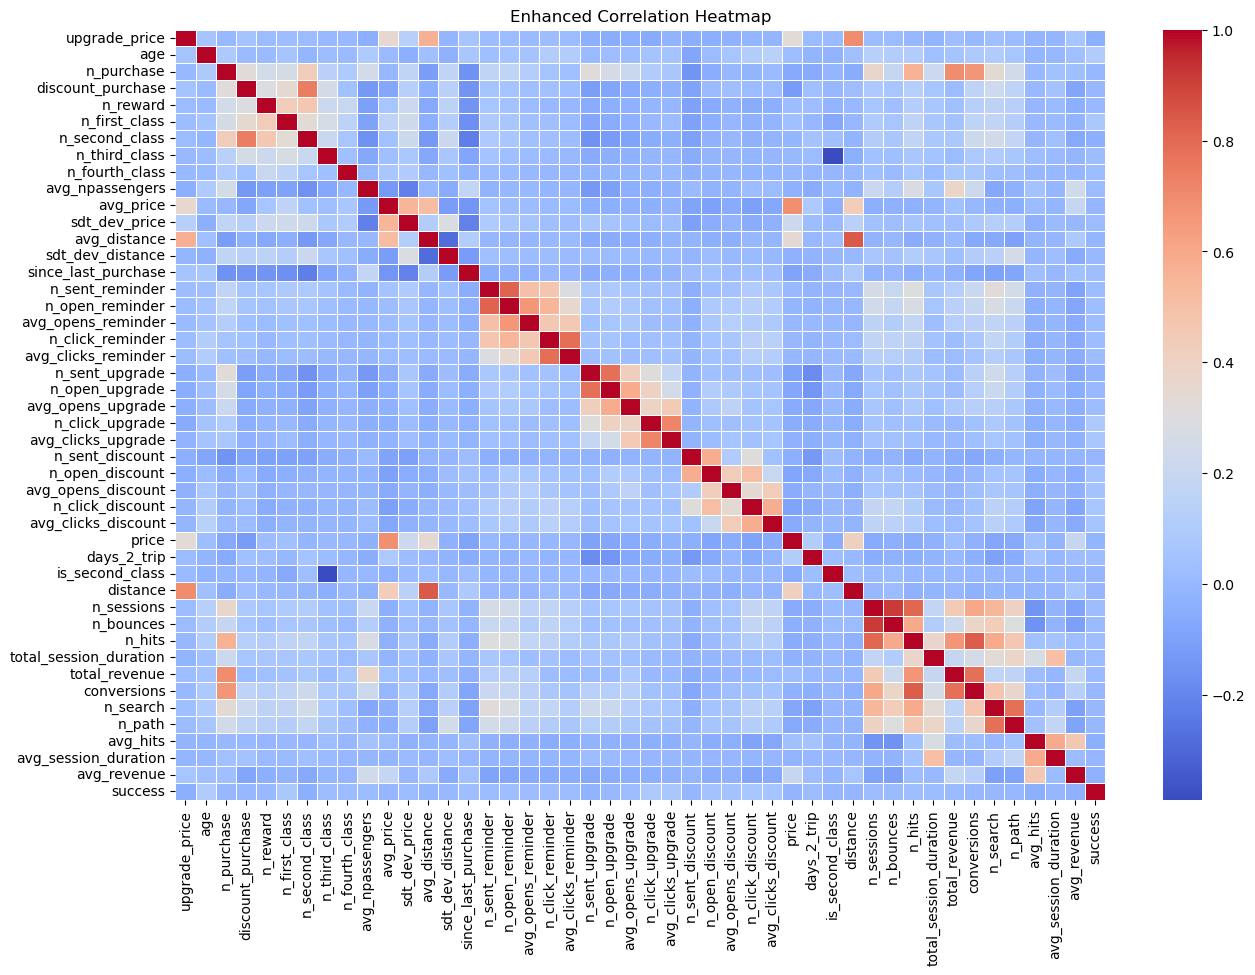

In [4]:
plt.figure(figsize=(15, 10))
correlation_matrix = email_data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Enhanced Correlation Heatmap')
plt.show()

<h3>Splitting the data into training data and testing data.</h3>
<p>It is split into 80% training, 20% testing</p>

In [5]:
X = email_data.drop(columns=['success'])
y = email_data['success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Random Forest</h3>
<p> Prints out best hyperparameters and best score </p>

In [6]:
rf = RandomForestClassifier(random_state=42)

# Define a smaller hyperparameter grid for faster tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

# Perform Randomized Search with fewer iterations for speed
random_search = RandomizedSearchCV(rf, param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  18.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  19.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=  18.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  11.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  11.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=  10.8s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   8.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   8.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   8.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=  10.9s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=  11.7s
[CV] END max_depth=10, min_samples_sp

<h3> Checking Accuracy of Model </h3>
<p> The test accuracy came out at .987. This is a high accuracy rate which most likely points to overfitting. </p>

Test Accuracy: 0.9868921221654214
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      7262
        True       0.99      0.73      0.84       367

    accuracy                           0.99      7629
   macro avg       0.99      0.87      0.92      7629
weighted avg       0.99      0.99      0.99      7629



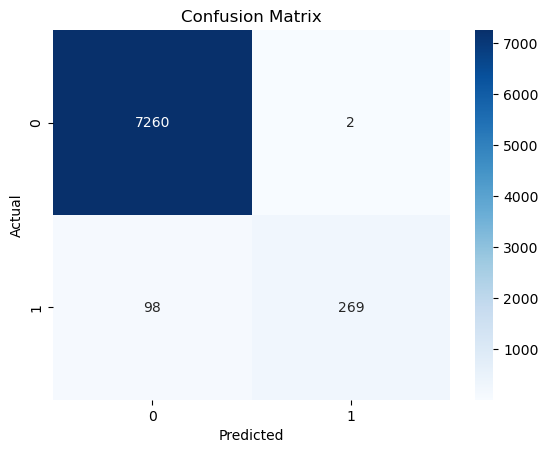

In [7]:
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h3> Feature Importance </h3>

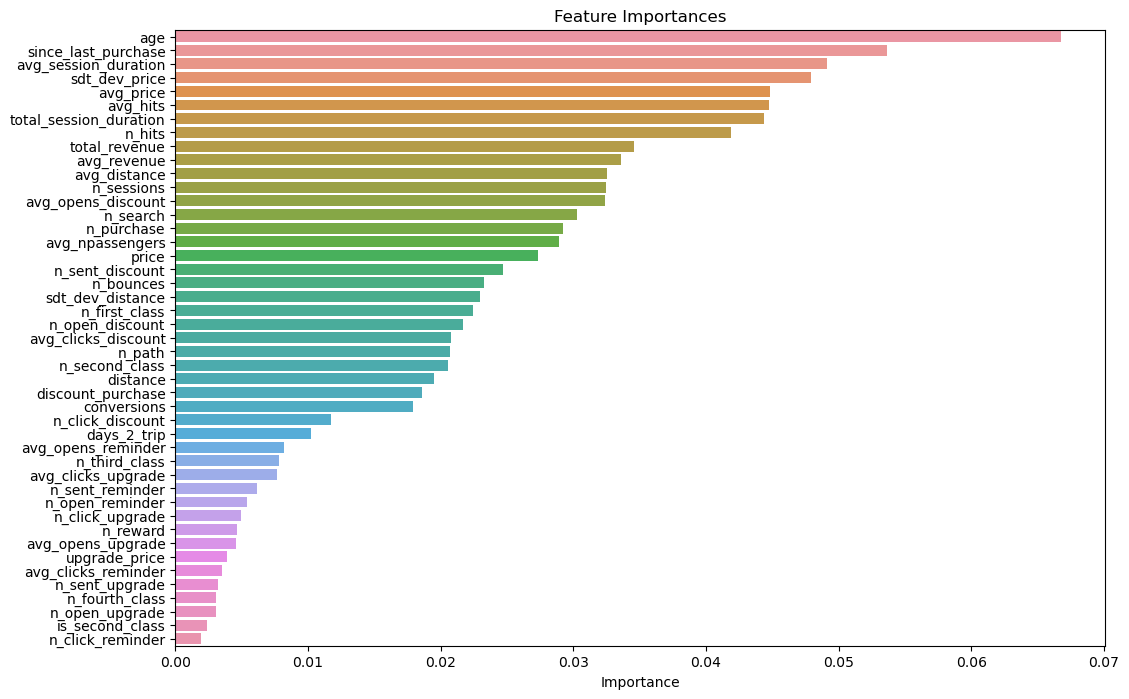

In [8]:
feature_importances = pd.DataFrame(best_rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()

<h2>Conclusion</h2>
<p>The Random Forest model effectively predicted email marketing open rates, achieving high accuracy and strong performance across various metrics. Its ability to manage mixed data types, handle class imbalance, and capture complex relationships contributed significantly to its success. The model’s feature importance analysis provided valuable insights into key factors influencing campaign success, making it a practical tool for data-driven marketing optimization.

However, to further improve the model’s generalizability, future iterations could explore alternative algorithms like Gradient Boosting and Logistic Regression while addressing overfitting with feature selection, regularization, and hyperparameter tuning. Techniques such as SMOTE and decision threshold adjustments could also help balance the dataset and improve recall for the minority class.</p>